In [26]:
import pandas as pd
df=pd.read_csv("all_kindle_review .csv")

In [27]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


## Data Pre-processing

In [28]:
import numpy as np
from nltk.corpus import stopwords
import nltk
import re

nltk.download('stopwords')

def preprocess_text(text):
    #We first remove the HTML tags
    text=re.sub(r'<*.?>',' ',text)
    #And remove all the non-alphabetical characters
    text=re.sub(r'[^a-zA-Z]',' ',text)
    #convert the text to lower
    text=text.lower()
    #tokenize
    words=text.split()
    #remove the stopwords
    words=[word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)
    
#apply preprocessing
df['cleaned_review']=df['reviewText'].apply(preprocess_text)   

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nithyasreekusakula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df['cleaned_review']

0        jace rankin may short nothing mess man hauled ...
1        great short read want put read one sitting sex...
2        start saying first four books expecting conclu...
3        aggie angela lansbury carries pocketbooks inst...
4        expect type book library pleased find price right
                               ...                        
11995    valentine cupid vampire jena ian another vampi...
11996    read seven books series apocalyptic adventure ...
11997    book really cuppa situation man capturing woma...
11998    tried use charge kindle even register charging...
11999    taking instruction look often hidden world sex...
Name: cleaned_review, Length: 12000, dtype: object

In [30]:
#Applying Sentiment labels
df['sentiment']=df['rating'].apply(lambda x:1 if x>=4 else 0)
print(df[['reviewText','cleaned_review','rating','sentiment']].head())

                                          reviewText  \
0  Jace Rankin may be short, but he's nothing to ...   
1  Great short read.  I didn't want to put it dow...   
2  I'll start by saying this is the first of four...   
3  Aggie is Angela Lansbury who carries pocketboo...   
4  I did not expect this type of book to be in li...   

                                      cleaned_review  rating  sentiment  
0  jace rankin may short nothing mess man hauled ...       3          0  
1  great short read want put read one sitting sex...       5          1  
2  start saying first four books expecting conclu...       3          0  
3  aggie angela lansbury carries pocketbooks inst...       3          0  
4  expect type book library pleased find price right       4          1  


# Splitting the data into train and test

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['cleaned_review'],df['sentiment'],test_size=0.2,random_state=42)

## Bag of words

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [33]:
#Initializing the count vectorizer
cv=CountVectorizer()
X_train_bow=cv.fit_transform(X_train)
X_test_bow=cv.transform(X_test)

#Naive bayes classifier
model_1=MultinomialNB()
model_1.fit(X_train_bow,y_train)

#predict on the test data
y_pred=model_1.predict(X_test_bow)

#evaluate the model
accuracy_bow=accuracy_score(y_test,y_pred)
c_report=classification_report(y_test,y_pred)

print("Bag Of Words Accuracy: ",accuracy)
print("Bag of words classification report: ",c_report)


Bag Of Words Accuracy:  0.8341666666666666
Bag of words classification report:                precision    recall  f1-score   support

           0       0.80      0.83      0.82      1190
           1       0.83      0.80      0.81      1210

    accuracy                           0.82      2400
   macro avg       0.82      0.82      0.82      2400
weighted avg       0.82      0.82      0.82      2400



## TFIDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

tfidf_v=TfidfVectorizer()
X_train_tfidf=tfidf_v.fit_transform(X_train)
X_test_tfidf=tfidf_v.transform(X_test)

model_2=LogisticRegression()
model_2.fit(X_train_tfidf,y_train)

y_pred=model_2.predict(X_test_tfidf)

accuracy_tfidf=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("Tfidf Accuracy: ",accuracy)
print("Tfidf classification report: ",report)



Tfidf Accuracy:  0.8341666666666666
Tfidf classification report:                precision    recall  f1-score   support

           0       0.85      0.81      0.83      1190
           1       0.82      0.85      0.84      1210

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400



## Word2Vec

In [35]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [36]:
tokenized_reviews=df['cleaned_review'].apply(nltk.word_tokenize)

In [37]:
tokenized_reviews

0        [jace, rankin, may, short, nothing, mess, man,...
1        [great, short, read, want, put, read, one, sit...
2        [start, saying, first, four, books, expecting,...
3        [aggie, angela, lansbury, carries, pocketbooks...
4        [expect, type, book, library, pleased, find, p...
                               ...                        
11995    [valentine, cupid, vampire, jena, ian, another...
11996    [read, seven, books, series, apocalyptic, adve...
11997    [book, really, cuppa, situation, man, capturin...
11998    [tried, use, charge, kindle, even, register, c...
11999    [taking, instruction, look, often, hidden, wor...
Name: cleaned_review, Length: 12000, dtype: object

In [38]:
word2vec_model=Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

In [39]:
def get_review_vector(review, model):
    words=review.split()
    word_vectors=[model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)
    
#Coverting reviews to word vectors
X_train_w2v=np.array([get_review_vector(review, word2vec_model) for review in X_train])
X_test_w2v=np.array([get_review_vector(review, word2vec_model) for review in X_test])

#Train a random forest classifier
model_w2v=RandomForestClassifier()
model_w2v.fit(X_train_w2v,y_train)

#Predict on the test set
y_pred_w2v=model_w2v.predict(X_test_w2v)

#Evaluate the model
accuracy_w2v=accuracy_score(y_test,y_pred_w2v)
report_w2v=classification_report(y_test,y_pred_w2v)

print("Word2Vec Model Accuracy",accuracy_w2v)
print("Word2Vec Model Classification Report", report_w2v)

Word2Vec Model Accuracy 0.7508333333333334
Word2Vec Model Classification Report               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1190
           1       0.75      0.75      0.75      1210

    accuracy                           0.75      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.75      0.75      0.75      2400



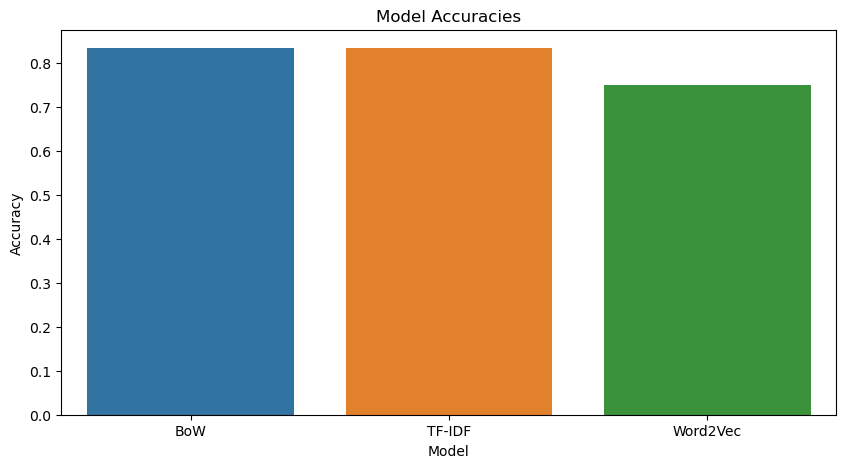

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the accuracies of the models
accuracies = [accuracy, accuracy_tfidf, accuracy_w2v]
models = ['BoW', 'TF-IDF', 'Word2Vec']

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


In [45]:
# Sample reviews
example_reviews = [
    "I absolutely love my new Kindle! It's lightweight and the battery lasts forever.",
    "This book was a waste of time. The plot was boring and the characters were uninteresting.",
    "The Kindle Paperwhite is fantastic! The screen is clear and easy to read even in bright sunlight.",
    "I'm very disappointed with this book. The storyline was predictable and poorly written.",
    "Great product! I've been using it every day and I couldn't be happier.",
    "Terrible book. The author clearly didn't do their research, and it shows."
]

# Preprocess the example reviews
cleaned_example_reviews = [preprocess_text(review) for review in example_reviews]

# Predict sentiment using BoW model
example_reviews_bow = cv.transform(cleaned_example_reviews)
predicted_sentiments_bow = model_1.predict(example_reviews_bow)

# Predict sentiment using TF-IDF model
example_reviews_tfidf = tfidf_v.transform(cleaned_example_reviews)
predicted_sentiments_tfidf = model_2.predict(example_reviews_tfidf)

# Predict sentiment using Word2Vec model
example_reviews_w2v = np.array([get_review_vector(review, word2vec_model) for review in cleaned_example_reviews])
predicted_sentiments_w2v = model_w2v.predict(example_reviews_w2v)

# Display results
for review, pred_bow, pred_tfidf, pred_w2v in zip(example_reviews, predicted_sentiments_bow, predicted_sentiments_tfidf, predicted_sentiments_w2v):
    print(f"Review: {review}")
    print(f"Predicted Sentiment (BoW): {'Positive' if pred_bow == 1 else 'Negative'}")
    print(f"Predicted Sentiment (TF-IDF): {'Positive' if pred_tfidf == 1 else 'Negative'}")
    print(f"Predicted Sentiment (Word2Vec): {'Positive' if pred_w2v == 1 else 'Negative'}\n")


Review: I absolutely love my new Kindle! It's lightweight and the battery lasts forever.
Predicted Sentiment (BoW): Positive
Predicted Sentiment (TF-IDF): Positive
Predicted Sentiment (Word2Vec): Positive

Review: This book was a waste of time. The plot was boring and the characters were uninteresting.
Predicted Sentiment (BoW): Negative
Predicted Sentiment (TF-IDF): Negative
Predicted Sentiment (Word2Vec): Negative

Review: The Kindle Paperwhite is fantastic! The screen is clear and easy to read even in bright sunlight.
Predicted Sentiment (BoW): Positive
Predicted Sentiment (TF-IDF): Positive
Predicted Sentiment (Word2Vec): Positive

Review: I'm very disappointed with this book. The storyline was predictable and poorly written.
Predicted Sentiment (BoW): Negative
Predicted Sentiment (TF-IDF): Negative
Predicted Sentiment (Word2Vec): Negative

Review: Great product! I've been using it every day and I couldn't be happier.
Predicted Sentiment (BoW): Positive
Predicted Sentiment (TF-IDF)